# Pandas and Visualization Homework

## Preliminaries - set up

In [ ]:
# load in pandas, visualization stuff

In [132]:
import pandas as pd

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Part 1

In [134]:
# load in data set
# Instructions: read in 'imdb_1000.csv' and store it in a DataFrame named movies
filepath = "/Users/spmeyer/DAT-DC-10/data/imdb_1000.csv"
movies = pd.read_csv(filepath)

In [135]:
# check loaded ok
movies.head(5)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [136]:
# check the number of rows and columns
movies.shape

(979, 6)

In [137]:
# check the data type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [138]:
# calculate the average movie duration
movies['duration'].mean()

120.97957099080695

In [139]:
# sort the DataFrame by duration to find the shortest...
movies.sort_values(by='duration').head(1)

,star_rating,title,content_rating,genre,duration,actors_list
389,8,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


In [140]:
# sort the DataFrame by duration to find the ... longest movies
movies.sort_values(by='duration').tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


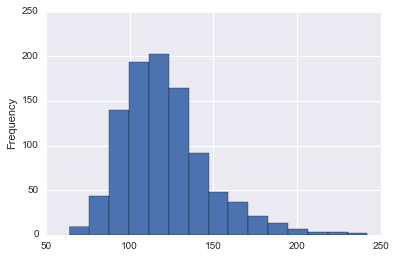

In [141]:
# create a histogram of duration
movies.duration.plot(kind='hist', bins=15)

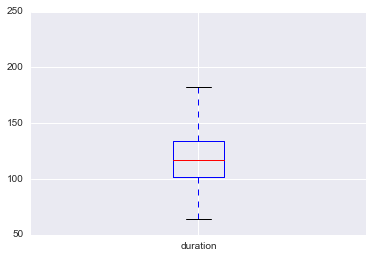

In [142]:
# use a box plot to display that same data
movies.duration.plot(kind="box")

## Part 2

In [143]:
# count how many movies have each of the content ratings
# remind myself of the data frame...
movies.head(5)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [144]:
movies.groupby('content_rating').count()

,star_rating,title,genre,duration,actors_list
content_rating,,,,,
APPROVED,47,47,47,47,47
G,32,32,32,32,32
GP,3,3,3,3,3
NC-17,7,7,7,7,7
NOT RATED,65,65,65,65,65
PASSED,7,7,7,7,7
PG,123,123,123,123,123
PG-13,189,189,189,189,189
R,460,460,460,460,460


In [145]:
# hmm... above isn't quite laid out how I want... let's try again...
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

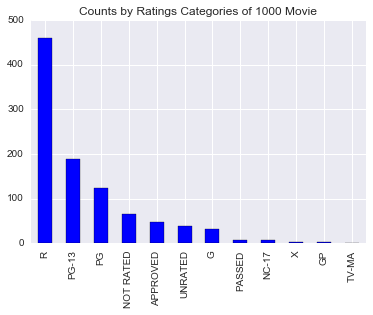

In [148]:
# use a visualization to display that same data, including a title and x and y labels
movies.content_rating.value_counts().plot(kind="bar", title="Counts by Ratings Categories of 1000 Movie")
# Hmmm... I don't seem to be able to add the x and y labels... internet, you are letting me down...
# plt.xlabel("Rating", fontsize=10)
# plt.ylabel("Counts", fontsize=10)

In [149]:
# convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP
movies.content_rating.replace("NOT RATED", "UNRATED")

0             R
1             R
2             R
3         PG-13
4             R
5       UNRATED
6       UNRATED
7         PG-13
8             R
9             R
10        PG-13
11        PG-13
12           PG
13        PG-13
14        PG-13
15        PG-13
16            R
17      UNRATED
18            R
19           PG
20            R
21            R
22     APPROVED
23            R
24            R
25        PG-13
26        PG-13
27            R
28            R
29       PASSED
         ...   
949          PG
950           R
951           R
952           R
953          PG
954       PG-13
955           R
956          PG
957           R
958       PG-13
959           R
960       PG-13
961           R
962          PG
963           R
964       PG-13
965       PG-13
966       PG-13
967           R
968           R
969           R
970           R
971           R
972       NC-17
973       PG-13
974          PG
975          PG
976       PG-13
977          PG
978           R
Name: content_rating, dt

In [150]:
# THAT WAS noisy and incomplete.  Can I change a whole list at once?  And quietly?
movies.content_rating.replace(["NOT RATED", "APPROVED", "PASSED", "GP"], "UNRATED", inplace=True)

In [151]:
# Let's see if it worked....
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

In [152]:
# convert the following content ratings to "NC-17": X, TV-MA
movies.content_rating.replace(["X", "TV-MA"], "NC-17", inplace=True)

In [121]:
# Let's see if it worked....
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

In [153]:
# count the number of missing values in each column
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [154]:
# if there are missing values: examine them, then fill them in with "reasonable" values
# struggling with this...
# SUCCESS!
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [155]:
#now do above but fill in the content rating.
movies.content_rating.replace("NaN", "UNRATED", inplace= True)

In [159]:
# calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours
movies[movies.duration>=120].star_rating.mean()

7.948898678414082

In [160]:
movies[movies.duration<120].star_rating.mean()

7.838666666666657

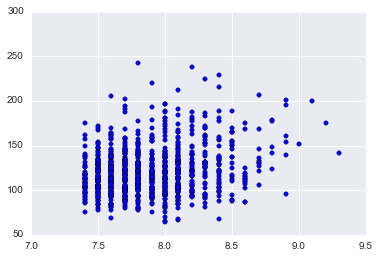

In [161]:
#use a visualization to detect whether there is a relationship between duration and star rating
#scatterplot duration star_rating?  boxplot?  correlation?
plt.scatter(movies.star_rating, movies.duration)


In [172]:
#calculate the average duration for each genre
movies.sort_values(by="genre").duration.mean()

120.97957099080695

In [173]:
# nope, let's try again...calculate the average duration for each genre
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Part 3

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


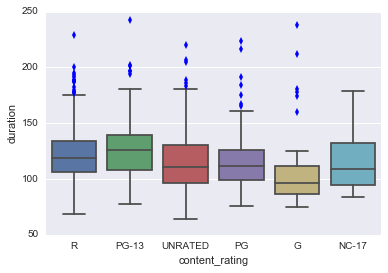

In [174]:
# visualize the relationship between content rating and duration
sns.boxplot(x="content_rating" , y="duration" , data=movies)

In [181]:
# determine the top rated movie (by star rating) for each genre
movies.groupby('genre').star_rating.first()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

In [199]:
# hmmm... not quite... I need the movie TITLE...
# group by genre, sort by star_rating, and then print first title.
# wait, actually, sort by star_rating, then group by genre, then print first title.
movies.sort_values("star_rating", ascending=False).groupby('genre').first()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Adventure,8.9,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Animation,8.6,Spirited Away,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
Biography,8.9,Schindler's List,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
Comedy,8.6,Modern Times,G,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
Drama,8.9,12 Angry Men,UNRATED,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
Family,7.9,E.T. the Extra-Terrestrial,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


In [222]:
# check if there are multiple movies with the same title, and if so, determine if they are actually duplicates
# Sort by movie title
movies.sort_values("title", ascending=True, inplace = False)
# is there a method to look for duplicates or do I need to compare index x to index x+1?
movies[movies.title.duplicated()]

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [223]:
# I'm not seeing duplicates.  I'm only seeing one movie with the title... 
# is the other observation not showing?  If so, why not?
movies.sort_values('title').title
movies[movies.title.duplicated()]


,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [210]:
movies[movies.title=="Dracula"]

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."


In [218]:
movies[movies.title=="The Girl with the Dragon Tattoo"]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."


In [234]:
# There's got to be a smsrter way to print out all the duplicates than hard coding the values, but I've tried logic tests and in lists and other things and am not figuring it out...
movies[movies.title.isin(movies[movies.title.duplicated()].title)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [232]:
duplicate_movies = movies[movies.title.duplicated()].title

In [233]:
movies[movies.title.isin(duplicate_movies)]


,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [238]:
# calculate the average star rating for each genre, but only include genres with at least 10 movies
# find genres with at least 10 movies and then calculate their average star rating
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts>=10]

7.9333333333333318

In [241]:
# that's not right...
# let's build this up more carefully...
# first, can we get mean star rating by genre?  yes.
movies.groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

In [245]:
# second, can we get counts by genre?  Yes.
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [246]:
# now, let's create the logic test to see which genres have >= 10 movies.
movies.genre.value_counts()>=10

Drama         True
Comedy        True
Action        True
Crime         True
Biography     True
Adventure     True
Animation     True
Horror        True
Mystery       True
Western      False
Thriller     False
Sci-Fi       False
Film-Noir    False
Family       False
Fantasy      False
History      False
Name: genre, dtype: bool

In [247]:
# bit by bit, putting it together... piece by piece, trying to make a coding work of art...
# this is what I want... combine the average with the logic test...
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts()>=10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64